# Image orientation classification using ResNet50 model

## To run this notebook you need:

0. All images must be in 224x224 resolution and RGB format (use C:\Users\User\DataScience\area51\notebooks\3_prepare_data.ipynb to prepare data)

1. folder structure for train/validation/test data: 

    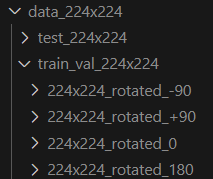
    * test_224x224 contains the images with mixed orientation to be estimated by the model
    * train_val_224x224 contains the images ordered by its orientation for model training
    

2. model folder (here: resnet50_1) for storing the trained model and atributes, and estimated results:

    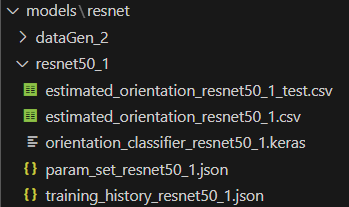


3. folder structure contains the image data (including duplicates) for each disease class to be estimated


    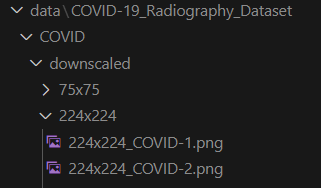


## How to use:

There are 3 predefined scenarios:

* Scenario 1: use this scenario for the full estimation cycle from data preparation-->training ... to checking/storing the results
* Scenario 2: use this scenario to estimate your data using saved ready-to-estimate model
* Scenario 3: use this scenario to use saved estimated data for further analysis





In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# Specify parameters

# specify constructor parameters

imgResolution = (224,224)
imgResStr = f"{imgResolution[0]}x{imgResolution[1]}"
model_name = f"resnet50_1"
test_dataset_dir = rf"C:\Users\User\DataScience\area51\data_{imgResStr}\test_{imgResStr}"
train_valid_dataset_dir = rf"C:\Users\User\DataScience\area51\data_{imgResStr}\train_val_{imgResStr}"

basic_params = {  # 1. basics
            "img_resolution" : imgResolution,
            "model_prefix": model_name,
            "model_dir": rf"C:\Users\User\DataScience\area51\models\resnet\{model_name}",
            "data_dir": r"C:\Users\User\DataScience\area51\data\COVID-19_Radiography_Dataset",
            "train_valid_dataset_dir": train_valid_dataset_dir,
            "test_dataset_dir": test_dataset_dir,
            "test_dataset_desc": rf'''
test dataset dir: {test_dataset_dir}
dataset contains images:
# rotation    :       image count
# 0°          :       12
# +90         :       13
# -90         :       13
# 180°        :       14
                                    ''',
}
# params for image_dataset_from_directory(...)
data_load_params = {
                    "directory": train_valid_dataset_dir,
                    "batch_size" : 32,
                    "seed": 1,
                    "label_mode": "categorical",
                    "color_mode": "rgb",        # resNet requires 3 channel otherwise needs to be trained from scratch 
                    "image_size": imgResolution,   # img_height, img_width
                    "shuffle": True,
                    "validation_split": 0.2,
                    "labels": "inferred",         #derive from folder structure
}
# Compilation parameters for functional/sequential model.compile(...)
model_params = {  
                    "input_shape": (imgResolution[0], imgResolution[1], 3), # input shape for the model (height, width, channels)
                    "optimizer": 'adam',
                    "loss": "categorical_crossentropy", #loss function
                    "metrics": ['accuracy'],
                    "layers_to_unfreeze": 0, 
}


from src.models.imageorientation import OrientationEstimatorResnet50

# initialize the estimator object
oer = OrientationEstimatorResnet50(**basic_params)

estimated results loaded from:  estimated_orientation_resnet50_1.csv
estimated as rotated: 9
estimated as correct: 21156
Estimates having confidence < 1:  7
        Disease       Orientation  Count
0         COVID       rotated_180      4
1         COVID        rotated_90      1
2  Lung_Opacity        rotated_90      2
3        Normal  rotated_minus_90      2
checking for NaNs:
Image          0
Orientation    0
Confidence     0
Disease        0
dtype: int64
estimated results loaded from:  estimated_orientation_resnet50_1.csv
Viral Pneumonia --> estimated orientation: rotated_90 --> total detected: 0
Viral Pneumonia --> estimated orientation: rotated_minus_90 --> total detected: 0
Viral Pneumonia --> estimated orientation: rotated_180 --> total detected: 0
estimated results loaded from:  estimated_orientation_resnet50_1.csv

COVID --> estimated orientation: rotated_90 --> total detected: 1


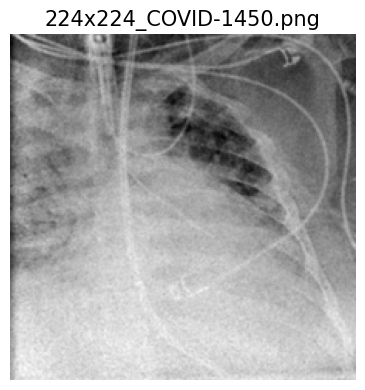

COVID --> estimated orientation: rotated_minus_90 --> total detected: 0

COVID --> estimated orientation: rotated_180 --> total detected: 4


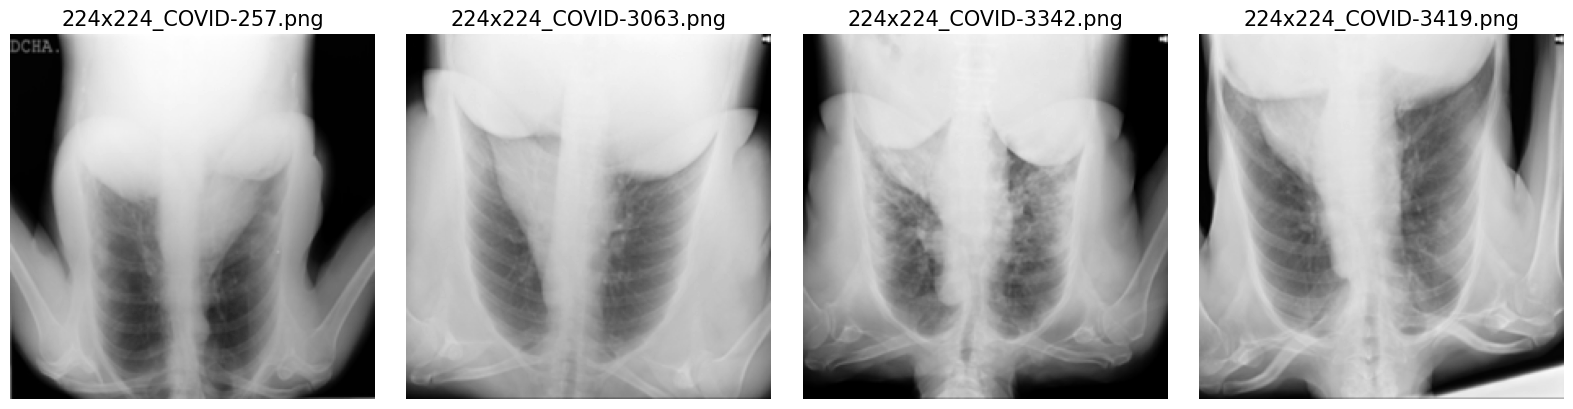

estimated results loaded from:  estimated_orientation_resnet50_1.csv

Lung_Opacity --> estimated orientation: rotated_90 --> total detected: 2


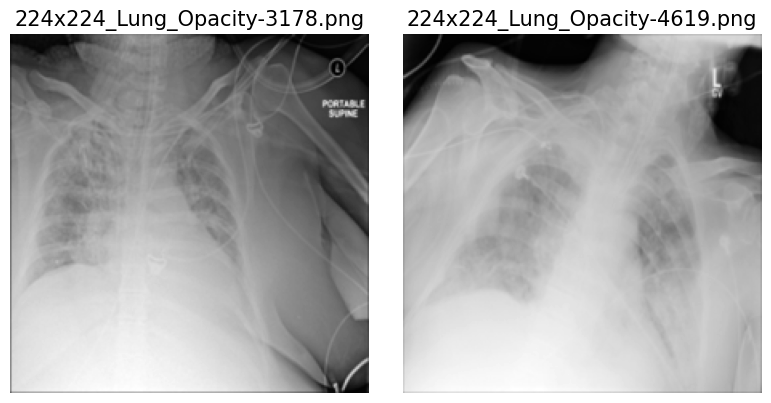

Lung_Opacity --> estimated orientation: rotated_minus_90 --> total detected: 0
Lung_Opacity --> estimated orientation: rotated_180 --> total detected: 0
estimated results loaded from:  estimated_orientation_resnet50_1.csv
Normal --> estimated orientation: rotated_90 --> total detected: 0

Normal --> estimated orientation: rotated_minus_90 --> total detected: 2


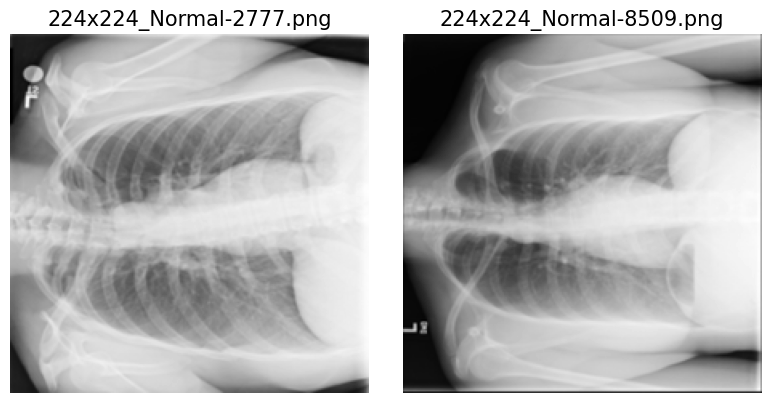

Normal --> estimated orientation: rotated_180 --> total detected: 0


In [5]:
# Scenario 3:--> use this scenario to use saved estimated data for further analysis

dataset="data"
# load and check estimated data
df_estimated = oer.loadEstimatedData(dataset, sort_by=["Disease", "Orientation", "Confidence"])
oer.checkEstimatedData(df_estimated)
oer.showRotatedImg(dataset)


In [ ]:
# Scenario 1: use this scenario for the full estimation cycle from data preparation-->training ... to checking/storing the results

dataset="test"


# initialize trainig/validation data and check it
train_ds, val_ds = oer.prepareTrainValidData(**data_load_params)
oer.checkTrainValDataStructure()

# compile model 
model = oer.getCompiledModel(**model_params)

# train model(to uncomment) & store (to uncomment) model and history
model, history = oer.train(target_val_acc=.98, epochs=5) # uncomment to train
oer.storeTrainedModel() # to uncomment to overwrite/initial saving

# show model metrics
oer.plotModelMetrics(include=["history"])

# estimate/save and check the results
df_estimated = oer.estimateImageOrientation(dataset=dataset, save_to_csv=True) # estimate image orientation for specified dataset
oer.checkEstimatedData(df_estimated)
oer.showRotatedImg(dataset=dataset)


In [28]:
# Scenario 2:--> use this scenario to estimate your data using ready-to-estimate model

oer.loadTrainedModel()
df_estimated = oer.estimateImageOrientation(dataset="test", save_to_csv=True) # estimate image orientation for specified dataset

model loaded from C:\Users\User\DataScience\area51\models\resnet\resnet50_1\orientation_classifier_resnet50_1.keras
model train history loaded from C:\Users\User\DataScience\area51\models\resnet\resnet50_1\training_history_resnet50_1.json
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1

<string>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
